## 2.Data Wrangling II
Create an “Academic performance” dataset of students and perform the following operations using Python.
1. Scan all variables for missing values and inconsistencies. If there are missing values and/or
inconsistencies, use any of the suitable techniques to deal with them.
3. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques
to deal with them.
4. Apply data transformations on at least one of the variables. The purpose of this
transformation should be one of the following reasons: to change the scale for better
understanding of the variable, to convert a non-linear relation into a linear one, or to decrease
the skewness and convert the distribution into a normal distribution.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import warnings
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

In [2]:
df=pd.read_csv('academicStudentdata.csv')

In [3]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15.0,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20.0,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10.0,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30.0,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40.0,50,12,50,No,Bad,Above-7,M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    480 non-null    object 
 1   NationalITy               480 non-null    object 
 2   PlaceofBirth              480 non-null    object 
 3   StageID                   480 non-null    object 
 4   GradeID                   480 non-null    object 
 5   SectionID                 480 non-null    object 
 6   Topic                     480 non-null    object 
 7   Semester                  480 non-null    object 
 8   Relation                  480 non-null    object 
 9   raisedhands               453 non-null    float64
 10  VisITedResources          480 non-null    int64  
 11  AnnouncementsView         480 non-null    int64  
 12  Discussion                480 non-null    int64  
 13  ParentAnsweringSurvey     480 non-null    object 
 14  Parentscho

In [5]:
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,453.000000,480.000000,480.000000,480.000000
mean,47.271523,54.797917,37.918750,43.283333
std,30.170152,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,17.000000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


## 1.Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them.

In [6]:
df.isnull()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
476,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
477,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
478,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

gender                       0
NationalITy                  0
PlaceofBirth                 0
StageID                      0
GradeID                      0
SectionID                    0
Topic                        0
Semester                     0
Relation                     0
raisedhands                 27
VisITedResources             0
AnnouncementsView            0
Discussion                   0
ParentAnsweringSurvey        0
ParentschoolSatisfaction     0
StudentAbsenceDays           0
Class                        0
dtype: int64

In [8]:
new_df=df["raisedhands"].replace(np.nan,0)

In [9]:
new_df.isnull().sum()

0

In [10]:
df.dropna(axis=0,inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 453 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    453 non-null    object 
 1   NationalITy               453 non-null    object 
 2   PlaceofBirth              453 non-null    object 
 3   StageID                   453 non-null    object 
 4   GradeID                   453 non-null    object 
 5   SectionID                 453 non-null    object 
 6   Topic                     453 non-null    object 
 7   Semester                  453 non-null    object 
 8   Relation                  453 non-null    object 
 9   raisedhands               453 non-null    float64
 10  VisITedResources          453 non-null    int64  
 11  AnnouncementsView         453 non-null    int64  
 12  Discussion                453 non-null    int64  
 13  ParentAnsweringSurvey     453 non-null    object 
 14  ParentschoolSat

## 2.Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them.

Before Shape (453, 17)
After Shape (405, 17)


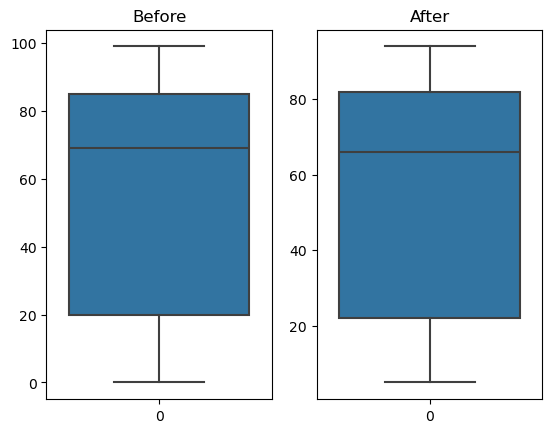

In [12]:
warnings.filterwarnings("ignore")
fig,axis=plt.subplots(1,2)
max_val=df.VisITedResources.quantile(0.95)
min_val=df.VisITedResources.quantile(0.05)
print("Before Shape",df.shape)
df2=df[(df["VisITedResources"]> min_val) & (df["VisITedResources"]<max_val)]
print("After Shape",df2.shape)
sb.boxplot(df["VisITedResources"],orient='v',ax=axis[0])
axis[0].title.set_text("Before")
sb.boxplot(df2["VisITedResources"],orient='v',ax=axis[1])
axis[1].title.set_text("After")
plt.show()

## 3.Apply data transformations on at least one of the variables. The purpose of this transformation should be one of the following reasons: to change the scale for better understanding of the variable, to convert a non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a normal distribution.

In [13]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15.0,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20.0,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10.0,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30.0,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40.0,50,12,50,No,Bad,Above-7,M


In [14]:
scaler=StandardScaler()              #Scalaing the data 
x = df[['raisedhands','VisITedResources','AnnouncementsView','Discussion']]
scaledf=scaler.fit_transform(x)
print(scaledf)

[[-1.07083326 -1.21673018 -1.38684384 -0.84327718]
 [-0.90492333 -1.09415067 -1.34871553 -0.66147413]
 [-1.2367432  -1.49253408 -1.46310047 -0.47967109]
 ...
 [ 0.25644622  0.56067273 -0.50989258 -0.51603169]
 [-0.57310346 -1.1860853  -0.92930405  0.50206537]
 [-0.40719352 -1.27801993 -0.58614921  0.68386841]]


<Axes: >

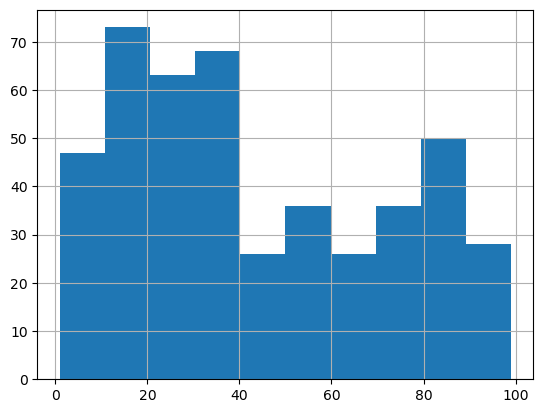

In [15]:
df.Discussion.hist()

<Axes: xlabel='Discussion', ylabel='Density'>

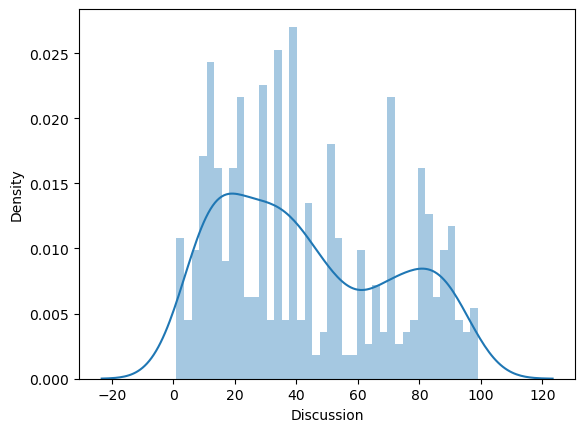

In [16]:
sb.distplot(df['Discussion'],bins=40)

In [17]:
df['Discussion'].skew()

0.3936552505845156

In [18]:
log=np.log(df['Discussion'])
print(log.skew())

-1.0657169168752911


<Axes: xlabel='Discussion', ylabel='Density'>

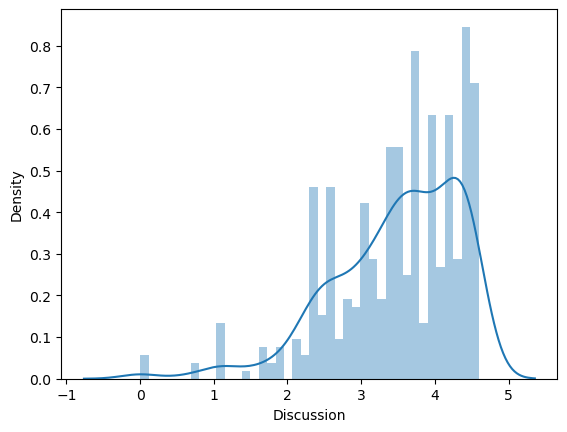

In [19]:
sb.distplot(log,bins=40)